In [1]:
!pip install opencv-python

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os   #iterate through directries and join pads
import cv2  

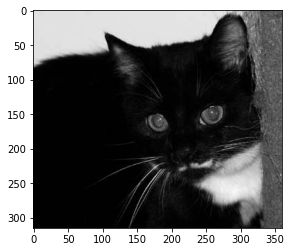

In [4]:
DATADIR = "/gdrive/My Drive/Dataset/Cat & Dogs"
CATEGORIES = ["Cat","Dog"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  #path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(315, 360)


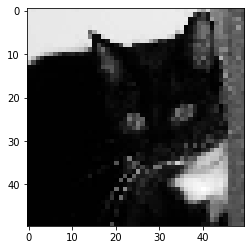

In [6]:
#Normalize the shape of all the images

IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  #path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [26]:
print(len(training_data))

24946


In [24]:
import random

random.shuffle(training_data)

In [25]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
0
1
0
0


In [11]:
X = [] #feature set
y = [] #label set

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1-value for grey scale 3-RGB

In [13]:
#Saving the model

#import pickle

#pickle_out = open('X.pickle','wb')
#pickle.dump(X, pickle_out)
#pickle_out.close()

#pickle_out = open('y.pickle','wb')
#pickle.dump(y, pickle_out)
#pickle_out.close()

In [14]:
# Loading the model

#pickle_in = open('X.pickle','rb')
#X = pickle.load(pickle_in)

#pickle_in = open('y.pickle','rb')
#y = pickle.load(pickle_in)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [16]:
#Normalize the data 

X = X/255.0

In [17]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [18]:
# Building the Model

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())   #this converts our 3D features maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, validation_split=0.1, epochs=20)

Epoch 1/20
702/702 [==============================] - 4s 6ms/step - loss: 0.6050 - accuracy: 0.6647 - val_loss: 0.5285 - val_accuracy: 0.7371
Epoch 2/20
702/702 [==============================] - 4s 5ms/step - loss: 0.4996 - accuracy: 0.7594 - val_loss: 0.4994 - val_accuracy: 0.7575
Epoch 3/20
702/702 [==============================] - 4s 5ms/step - loss: 0.4593 - accuracy: 0.7826 - val_loss: 0.4716 - val_accuracy: 0.7667
Epoch 4/20
702/702 [==============================] - 4s 5ms/step - loss: 0.4259 - accuracy: 0.8054 - val_loss: 0.4836 - val_accuracy: 0.7643
Epoch 5/20
702/702 [==============================] - 4s 5ms/step - loss: 0.3950 - accuracy: 0.8221 - val_loss: 0.4485 - val_accuracy: 0.7860
Epoch 6/20
702/702 [==============================] - 4s 5ms/step - loss: 0.3680 - accuracy: 0.8358 - val_loss: 0.4494 - val_accuracy: 0.7892
Epoch 7/20
702/702 [==============================] - 4s 5ms/step - loss: 0.3387 - accuracy: 0.8510 - val_loss: 0.4478 - val_accuracy: 0.7908
Epoch 

In [19]:
#Analizing the models with TensorBoard

NAME = 'Cats-vs-dogs-cnn-64x2-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='/gdrive/My Drive/Dataset/logs{}'.format(NAME))


In [20]:
# To run multiple models in same time and define a fraction of space allocated

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fractions=0.333)
#sess = tf.Session(config = tf.ConfigProto(gpu_options=gpu_options))

In [21]:
# Adding dropout layer to the current model


model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())   #this converts our 3D features maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, validation_split=0.1, epochs=20, callbacks=[tensorboard])

Epoch 1/20
702/702 [==============================] - 5s 7ms/step - loss: 0.6513 - accuracy: 0.6084 - val_loss: 0.5974 - val_accuracy: 0.6790
Epoch 2/20
702/702 [==============================] - 4s 6ms/step - loss: 0.5637 - accuracy: 0.7149 - val_loss: 0.5176 - val_accuracy: 0.7475
Epoch 3/20
702/702 [==============================] - 5s 6ms/step - loss: 0.5079 - accuracy: 0.7527 - val_loss: 0.5000 - val_accuracy: 0.7495
Epoch 4/20
702/702 [==============================] - 5s 6ms/step - loss: 0.4837 - accuracy: 0.7731 - val_loss: 0.4586 - val_accuracy: 0.7900
Epoch 5/20
702/702 [==============================] - 4s 6ms/step - loss: 0.4563 - accuracy: 0.7875 - val_loss: 0.4484 - val_accuracy: 0.7920
Epoch 6/20
702/702 [==============================] - 4s 6ms/step - loss: 0.4318 - accuracy: 0.8021 - val_loss: 0.4365 - val_accuracy: 0.7852
Epoch 7/20
702/702 [==============================] - 4s 6ms/step - loss: 0.4165 - accuracy: 0.8099 - val_loss: 0.4393 - val_accuracy: 0.8016
Epoch 

In [22]:
# Optimizing with tensorboard

import time

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
      tensorboard = TensorBoard(log_dir='/gdrive/My Drive/Dataset/logs{}'.format(NAME))
      print(NAME)

      model = Sequential()

      model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
      model.add(Activation("relu"))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Dropout(0.3))

      for l in range(conv_layer-1):
        model.add(Conv2D(layer_size,(3,3)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.3))

      model.add(Flatten())   #this converts our 3D features maps to 1D feature vectors

      for l in range(dense_layer):
        model.add(Dense(layer_size))
        model.add(Activation("relu"))
        model.add(Dropout(0.3))

      model.add(Dense(1))
      model.add(Activation("sigmoid"))

      model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

      model.fit(X, y, batch_size=32, validation_split=0.1, epochs=20, callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1595256223
Epoch 1/20
702/702 [==============================] - 3s 4ms/step - loss: 0.6233 - accuracy: 0.6491 - val_loss: 0.5746 - val_accuracy: 0.7102
Epoch 2/20
702/702 [==============================] - 3s 4ms/step - loss: 0.5616 - accuracy: 0.7154 - val_loss: 0.5582 - val_accuracy: 0.7098
Epoch 3/20
702/702 [==============================] - 3s 4ms/step - loss: 0.5317 - accuracy: 0.7380 - val_loss: 0.5367 - val_accuracy: 0.7311
Epoch 4/20
702/702 [==============================] - 3s 4ms/step - loss: 0.5135 - accuracy: 0.7531 - val_loss: 0.5408 - val_accuracy: 0.7242
Epoch 5/20
702/702 [==============================] - 3s 5ms/step - loss: 0.4982 - accuracy: 0.7612 - val_loss: 0.5384 - val_accuracy: 0.7355
Epoch 6/20
702/702 [==============================] - 3s 5ms/step - loss: 0.4841 - accuracy: 0.7713 - val_loss: 0.5149 - val_accuracy: 0.7519
Epoch 7/20
702/702 [==============================] - 3s 4ms/step - loss: 0.4774 - accuracy: 0.7757 - val_loss: 0

In [27]:
# We found 3-conv_layers, 128-Layer_size, 0-dense_layer is best for our model after optimization


model2 = Sequential()

model2.add(Conv2D(128, (3,3), input_shape = X.shape[1:]))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(128,(3,3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(128,(3,3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

model2.add(Flatten())   #this converts our 3D features maps to 1D feature vectors

model2.add(Dense(1))
model2.add(Activation("sigmoid"))

model2.compile(optimizer="adam",
              loss="binary_crossentropy",
             metrics=['accuracy'])

model2.fit(X, y, batch_size=32, validation_split=0.1, epochs=20, callbacks=[tensorboard])

Epoch 1/20
702/702 [==============================] - 7s 10ms/step - loss: 0.6528 - accuracy: 0.6100 - val_loss: 0.5959 - val_accuracy: 0.6886
Epoch 2/20
702/702 [==============================] - 7s 10ms/step - loss: 0.5617 - accuracy: 0.7132 - val_loss: 0.5253 - val_accuracy: 0.7242
Epoch 3/20
702/702 [==============================] - 7s 10ms/step - loss: 0.4968 - accuracy: 0.7592 - val_loss: 0.4597 - val_accuracy: 0.7743
Epoch 4/20
702/702 [==============================] - 7s 10ms/step - loss: 0.4568 - accuracy: 0.7855 - val_loss: 0.4323 - val_accuracy: 0.7968
Epoch 5/20
702/702 [==============================] - 7s 10ms/step - loss: 0.4252 - accuracy: 0.8051 - val_loss: 0.4145 - val_accuracy: 0.8048
Epoch 6/20
702/702 [==============================] - 7s 10ms/step - loss: 0.4065 - accuracy: 0.8137 - val_loss: 0.3939 - val_accuracy: 0.8160
Epoch 7/20
702/702 [==============================] - 7s 10ms/step - loss: 0.3827 - accuracy: 0.8301 - val_loss: 0.3868 - val_accuracy: 0.8104